In [1]:
import pymongo
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

import pandas as pd

In [2]:
dftw = pd.read_csv('data/twitter_raw.csv')
dftw

,author,content,date,id,url
0,__invictus_,is it me or is this kinda a shit payout for a ...,2020-12-08T22:18:02.000Z,1336434889533644804,https://twitter.com/__invictus_/status/1336434...
1,_markel___,"very good, someone collected the info about al...",2022-09-05T19:34:01.000Z,1566872295716577282,https://twitter.com/_markel___/status/15668722...
2,_markel___,"what, they ""fixed"" cve-2021-0146 (cse security...",2022-06-09T23:59:51.000Z,1535049062927704065,https://twitter.com/_markel___/status/15350490...
3,_markel___,i'm pretty sure this problem is related to sgx...,2022-05-10T22:07:48.000Z,1524149231765925892,https://twitter.com/_markel___/status/15241492...
4,_odisseus,"great blog post by @david_erceg about: ""memory...",2022-10-21T06:48:46.000Z,1583349558746132480,https://twitter.com/_odisseus/status/158334955...
...,...,...,...,...,...
23055,ksg93rd,#malware_analysis dark crystal rat agent deep ...,2022-10-23T08:09:06.000Z,1584094552243130368,https://twitter.com/ksg93rd/status/15840945522...
23056,Dinosn,htb: faculty,2022-10-22T17:40:12.000Z,1583875884460953600,https://twitter.com/Dinosn/status/158387588446...
23057,ksg93rd,#offensive_security edr bypass through kernel ...,2022-10-23T08:08:52.000Z,1584094491278860288,https://twitter.com/ksg93rd/status/15840944912...
23058,Dinosn,usbsas - tool and framework for securely readi...,2022-10-22T17:35:19.000Z,1583874654309011457,https://twitter.com/Dinosn/status/158387465430...


In [3]:
startday = (datetime.datetime.now() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
endday = (datetime.datetime.now()).strftime('%Y-%m-%d')

def get_content_dt(df, word, startdate=startday, enddate=endday):
    content = []
    startdate = datetime.datetime.strptime(startdate, '%Y-%m-%d')
    enddate = datetime.datetime.strptime(enddate, '%Y-%m-%d')
    numdays = (enddate - startdate).days
    df.date = pd.to_datetime(df.date)
    df = df[(df.date >= startdate) & (df.date <= enddate)]
    for i in range(len(df)):
        if word in df.iloc[i]['content']:
            content.append(df.iloc[i])
    freq_val = []
    for day in range(numdays):
        day = startdate + datetime.timedelta(days=day)
        freq_val.append(len([x for x in content if x['date'].date() == day.date()]))
    freq = dict(zip([startdate + datetime.timedelta(days=x) for x in range(numdays)], freq_val))
    df = pd.DataFrame(freq.items(), columns=['date', 'freq'])
    df = df.sort_values(by='date', ascending=False)
    return df

In [4]:
startday = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime('%Y-%m-%d')
endday = (datetime.datetime.now()).strftime('%Y-%m-%d')

def get_cve_topk(df, startdate=startday, enddate=endday, k=8):
    cve = {}
    startdate = datetime.datetime.strptime(startdate, '%Y-%m-%d')
    enddate = datetime.datetime.strptime(enddate, '%Y-%m-%d')
    numdays = (enddate - startdate).days
    df.date = pd.to_datetime(df.date)
    df = df[(df.date >= startdate) & (df.date <= enddate)]
    for i in range(len(df)):
        # dt = datetime.datetime.strptime(df.iloc[i]['date'], '%Y-%m-%d')
        if startdate <= df.iloc[i]['date'] <= enddate:
            words = df.iloc[i]['content'].split()
            # create a set of words are cve
            cve_words = set()
            for word in words:
                if word.startswith('cve') and len(word) > 8:
                    word = word.lower().replace(':', '').replace(',', '').replace('.', '').replace(';', '').replace(')', '').replace('(', '')
                    cve_words.add(word)
            for word in cve_words:
                cve[word] = cve.get(word, 0) + 1
    sorted_cve = sorted(cve.items(), key=lambda x: x[1], reverse=True)
    topk = sorted_cve[:k]
    topk_cve = [x[0] for x in topk]
    return topk_cve

def get_content_dt(df, word, startdate=startday, enddate=endday):
    content = []
    startdate = datetime.datetime.strptime(startdate, '%Y-%m-%d')
    enddate = datetime.datetime.strptime(enddate, '%Y-%m-%d')
    numdays = (enddate - startdate).days
    df.date = pd.to_datetime(df.date)
    df = df[(df.date >= startdate) & (df.date <= enddate)]
    for i in range(len(df)):
        if word in df.iloc[i]['content']:
            content.append(df.iloc[i])
    freq_val = []
    for day in range(numdays):
        day = startdate + datetime.timedelta(days=day)
        freq_val.append(len([x for x in content if x['date'].date() == day.date()]))
    freq = dict(zip([startdate + datetime.timedelta(days=x) for x in range(numdays)], freq_val))
    df = pd.DataFrame(freq.items(), columns=['date', 'freq'])
    df = df.sort_values(by='date', ascending=False)
    return df


C:\Users\binhh\AppData\Local\Temp\ipykernel_17688\2465768676.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)
C:\Users\binhh\AppData\Local\Temp\ipykernel_17688\2465768676.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)
C:\Users\binhh\AppData\Local\Temp\ipykernel_17688\2465768676.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



         date  freq
29 2022-10-22     0
28 2022-10-21     1
27 2022-10-20     0
26 2022-10-19     1
25 2022-10-18     4
24 2022-10-17     2
23 2022-10-16     0
22 2022-10-15     0
21 2022-10-14     9
20 2022-10-13     3
19 2022-10-12     0
18 2022-10-11     6
17 2022-10-10     1
16 2022-10-09     1
15 2022-10-08     0
14 2022-10-07     5
13 2022-10-06     0
12 2022-10-05     0
11 2022-10-04     0
10 2022-10-03     0
9  2022-10-02     0
8  2022-10-01     0
7  2022-09-30     0
6  2022-09-29     0
5  2022-09-28     0
4  2022-09-27     0
3  2022-09-26     0
2  2022-09-25     0
1  2022-09-24     0
0  2022-09-23     0
         date  freq
29 2022-10-22     0
28 2022-10-21     6
27 2022-10-20     2
26 2022-10-19     7
25 2022-10-18     6
24 2022-10-17     2
23 2022-10-16     0
22 2022-10-15     0
21 2022-10-14     0
20 2022-10-13     0
19 2022-10-12     0
18 2022-10-11     0
17 2022-10-10     0
16 2022-10-09     0
15 2022-10-08     0
14 2022-10-07     0
13 2022-10-06     0
12 2022-10-05     0


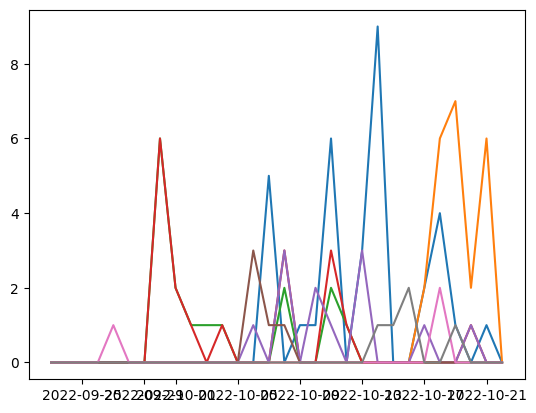

In [5]:
dftw = pd.read_csv('data/twitter_raw.csv')
dftw['date'] = pd.to_datetime(dftw['date']).apply(lambda x: x.strftime('%Y-%m-%d'))
dftw = dftw.sort_values(by='date', ascending=False)
cve = [1 if 'cve' in x.lower() else 0 for x in dftw['content']]
dftw['cve'] = cve
df = dftw[dftw.cve == 1]
startday = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime('%Y-%m-%d')
endday = (datetime.datetime.now()).strftime('%Y-%m-%d')

list_cve = get_cve_topk(df, startday, endday, 8)
ldf = []
for cve in list_cve:
    df_count = get_content_dt(df, cve)
    print(df_count)
    ldf.append(df_count)

for i in range(len(ldf)):
    plt.plot(ldf[i]['date'], ldf[i]['freq'], label=list_cve[i])